# Missing Data Analysis
## PHL Exoplanet Catalog

This notebook analyzes the extent and pattern of missing data in the restricted set of 30 approved features from the PHL Exoplanet Catalog.

Scope:
- Use entire dataset
- Analyze missing values only
- No imputation or cleaning
- Focus on amount, percentage, and relationships of missing data


Import Necessary Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Load Dataset

In [11]:
df = pd.read_csv("../../data/full_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (4048, 112)


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


Define Approved 30 Columns

In [12]:
approved_columns = [
    "P_MASS", "P_RADIUS", "P_DENSITY", "P_GRAVITY", "P_ESCAPE", "P_TYPE",
    "P_PERIOD", "P_SEMI_MAJOR_AXIS", "P_ECCENTRICITY", "P_INCLINATION",
    "P_OMEGA", "P_PERIASTRON", "P_APASTRON", "P_IMPACT_PARAMETER",
    "P_HILL_SPHERE",
    "S_MASS", "S_RADIUS", "S_LUMINOSITY", "S_TEMPERATURE", "S_AGE",
    "S_METALLICITY", "S_LOG_G", "S_TYPE", "S_MAG", "S_DISC",
    "S_MAGNETIC_FIELD",
    "S_SNOW_LINE", "S_TIDAL_LOCK", "P_DETECTION", "P_DISTANCE"
]


existing_cols = [col for col in approved_columns if col in df.columns]
missing_cols = [col for col in approved_columns if col not in df.columns]

print("Existing columns:", len(existing_cols))
print("Missing columns:", missing_cols)


Existing columns: 30
Missing columns: []


Verify Columns Exist

In [13]:
df_30 = df[existing_cols]
df_30.head()


,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,6165.86330,NaN,NaN,NaN,NaN,Jovian,326.03000,1.29,0.231,NaN,...,-0.35,2.31,K0 III,4.740,NaN,NaN,34.529063,0.642400,Radial Velocity,1.324418
1,4684.78480,NaN,NaN,NaN,NaN,Jovian,516.21997,1.53,0.080,NaN,...,-0.02,1.93,K4 III,5.016,NaN,NaN,42.732816,0.648683,Radial Velocity,1.534896
2,1525.57440,NaN,NaN,NaN,NaN,Jovian,185.84000,0.83,0.000,NaN,...,-0.24,2.63,G8 III,5.227,NaN,NaN,20.593611,0.600010,Radial Velocity,0.830000
3,1481.07850,NaN,NaN,NaN,NaN,Jovian,1773.40000,2.93,0.370,NaN,...,0.41,4.45,K0 V,6.610,NaN,NaN,2.141648,0.445415,Radial Velocity,3.130558
4,565.73385,NaN,NaN,NaN,NaN,Jovian,798.50000,1.66,0.680,NaN,...,0.06,4.36,G2.5 V,6.250,NaN,NaN,3.019411,0.473325,Radial Velocity,2.043792


Missing Value Summary Table

In [14]:
missing_summary = pd.DataFrame({
    "Total Rows": len(df_30),
    "Missing Count": df_30.isna().sum(),
    "Missing Percentage": (df_30.isna().sum() / len(df_30)) * 100
})

missing_summary = missing_summary.sort_values(
    by="Missing Percentage",
    ascending=False
)

missing_summary


,Total Rows,Missing Count,Missing Percentage
S_MAGNETIC_FIELD,4048,4048,100.000000
S_DISC,4048,4048,100.000000
P_ESCAPE,4048,3342,82.559289
P_DENSITY,4048,3342,82.559289
P_GRAVITY,4048,3342,82.559289
P_OMEGA,4048,3302,81.571146
P_INCLINATION,4048,3204,79.150198
S_TYPE,4048,2678,66.156126
P_ECCENTRICITY,4048,2668,65.909091
P_IMPACT_PARAMETER,4048,2639,65.192688


Missing Percentage Bar Chart

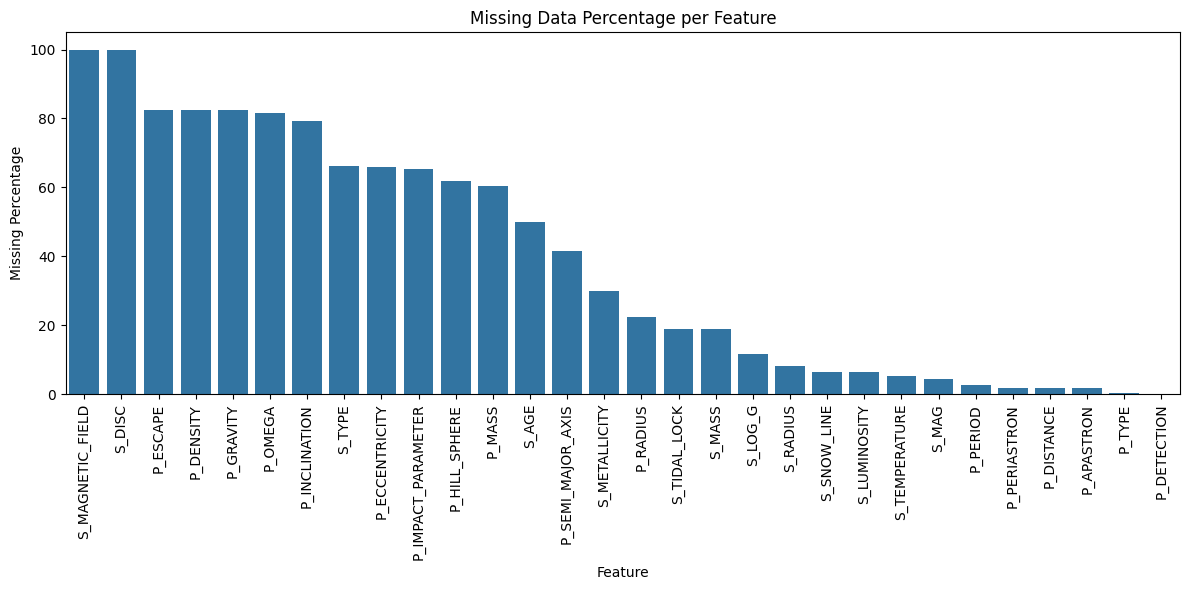

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_summary.index,
    y=missing_summary["Missing Percentage"]
)
plt.xticks(rotation=90)
plt.title("Missing Data Percentage per Feature")
plt.ylabel("Missing Percentage")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


Missing Data Matrix

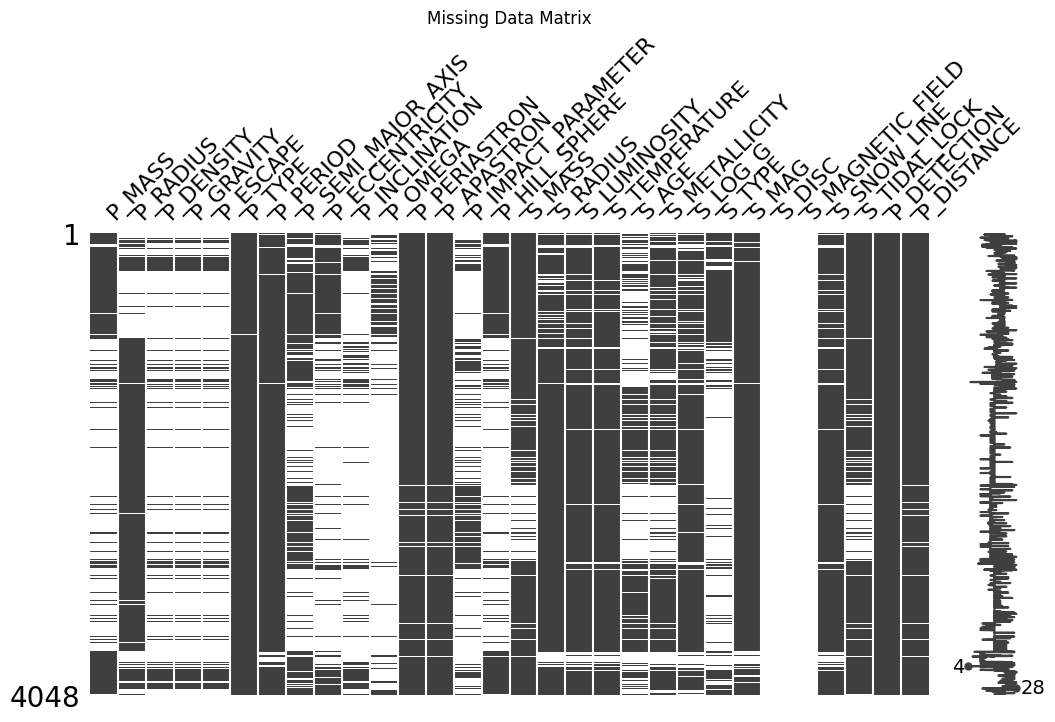

In [16]:
msno.matrix(df_30, figsize=(12, 6))
plt.title("Missing Data Matrix")
plt.show()


Missing Data Dendrogram

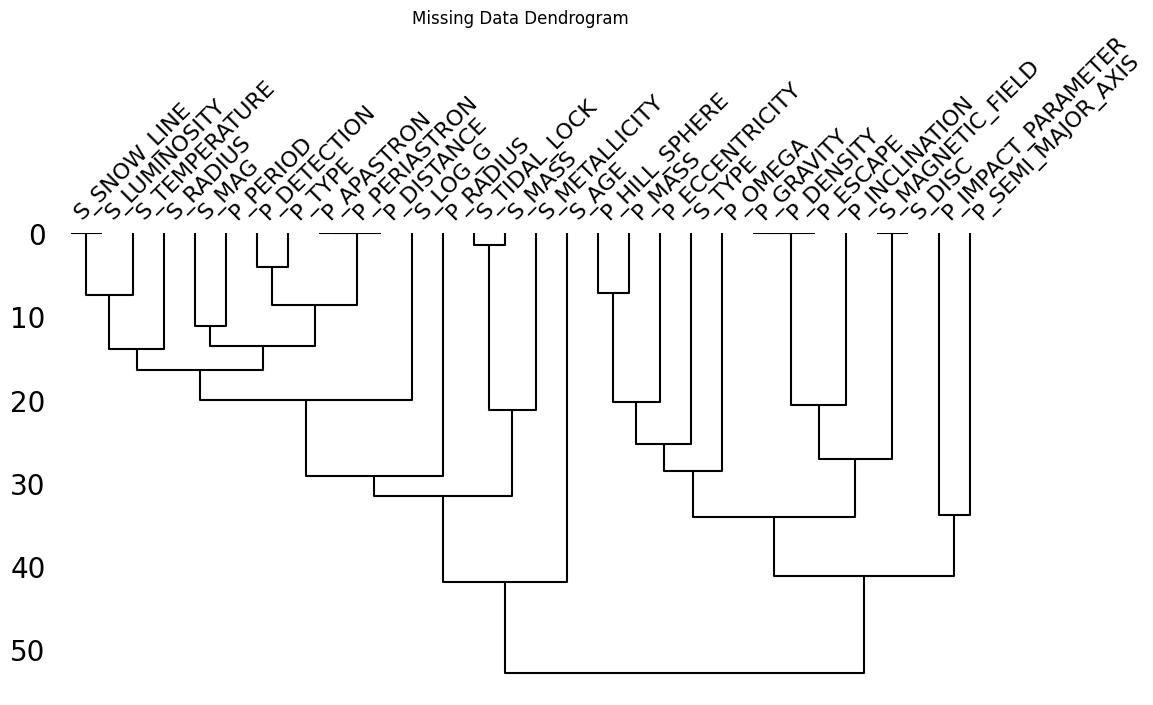

In [17]:
msno.dendrogram(df_30, figsize=(12, 6))
plt.title("Missing Data Dendrogram")
plt.show()


Missing Value Correlation Heatmap

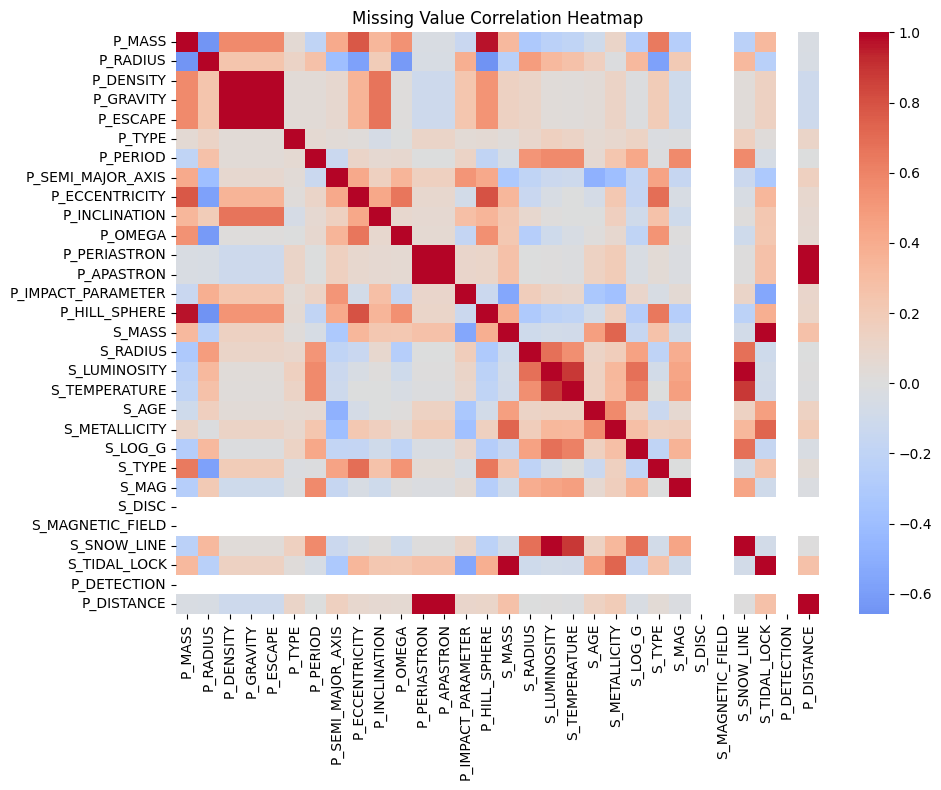

In [18]:
missing_corr = df_30.isna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0)
plt.title("Missing Value Correlation Heatmap")
plt.tight_layout()
plt.show()


Categorical vs Numerical Missingness

In [19]:
categorical_cols = [
    col for col in ["P_TYPE", "S_TYPE", "P_DETECTION", "S_DISC", "S_MAGNETIC_FIELD"]
    if col in df_30.columns
]

numerical_cols = [col for col in df_30.columns if col not in categorical_cols]

cat_missing = df_30[categorical_cols].isna().mean() * 100
num_missing = df_30[numerical_cols].isna().mean() * 100

cat_missing, num_missing.describe()


(P_TYPE                0.419960
 S_TYPE               66.156126
 P_DETECTION           0.000000
 S_DISC              100.000000
 S_MAGNETIC_FIELD    100.000000
 dtype: float64,
 count    25.000000
 mean     35.735178
 std      31.741900
 min       1.729249
 25%       6.472332
 50%      22.455534
 75%      65.192688
 max      82.559289
 dtype: float64)